# Basic Machine Learning

In [1]:
import numpy as np
import pandas as pd

## 1. Load Data

In [2]:
df = pd.read_csv("HeartFailure.csv")

In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [8]:

df.shape

(299, 13)

## 2. Split Data

In [10]:
X = df.iloc[:,0:12]
y = df['DEATH_EVENT']

In [14]:
y.shape

(299,)

In [13]:
X.shape

(299, 12)

In [15]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state= 100)

In [16]:
X_train.shape

(224, 12)

In [17]:
X_test.shape

(75, 12)

## 3. KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5866666666666667

In [37]:
y_predict = knn.predict(X_test)
y_predict

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [38]:
y_test

221    0
139    0
235    0
175    0
230    1
      ..
261    0
32     1
198    0
289    0
156    0
Name: DEATH_EVENT, Length: 75, dtype: int64

In [39]:
print('Accuracy on training set: {:.2f}' .format(knn.score(X_train,y_train)) )
print('Accuracy on test set    : {:.2f}'  .format(knn.score(X_test,y_test)))

Accuracy on training set: 0.74
Accuracy on test set    : 0.59


## 4. Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy : {:.2f}' .format( accuracy_score(y_test,y_predict)))
print('Precision: {:.2f}' .format( precision_score(y_test,y_predict)))
print('Recall   : {:.2f}' .format( recall_score(y_test,y_predict)))
print('F1       : {:.2f}' .format( f1_score(y_test,y_predict)))

Accuracy : 0.59
Precision: 0.38
Recall   : 0.40
F1       : 0.39


In [42]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_predict)
print(confusion)

[[34 16]
 [15 10]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69        50
           1       0.38      0.40      0.39        25

    accuracy                           0.59        75
   macro avg       0.54      0.54      0.54        75
weighted avg       0.59      0.59      0.59        75



In [47]:
k_range = range(1,20)
for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    print("k =", k, "--> Accuracy = ", knn.score(X_test, y_test).round(2))

k = 1 --> Accuracy =  0.57
k = 2 --> Accuracy =  0.68
k = 3 --> Accuracy =  0.55
k = 4 --> Accuracy =  0.65
k = 5 --> Accuracy =  0.59
k = 6 --> Accuracy =  0.65
k = 7 --> Accuracy =  0.61
k = 8 --> Accuracy =  0.64
k = 9 --> Accuracy =  0.63
k = 10 --> Accuracy =  0.63
k = 11 --> Accuracy =  0.63
k = 12 --> Accuracy =  0.63
k = 13 --> Accuracy =  0.63
k = 14 --> Accuracy =  0.65
k = 15 --> Accuracy =  0.65
k = 16 --> Accuracy =  0.65
k = 17 --> Accuracy =  0.65
k = 18 --> Accuracy =  0.65
k = 19 --> Accuracy =  0.65


## 5. Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
dt.score(X_test,y_test)

0.76

In [56]:
dt = DecisionTreeClassifier(max_depth= 5,min_samples_leaf= 10,random_state= 0)
dt.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=0)

In [59]:
dt.score(X_test,y_test)

0.7866666666666666

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = dt.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[41  9]
 [ 7 18]]


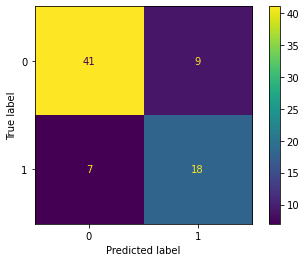

In [65]:
cd = ConfusionMatrixDisplay(confusion).plot()

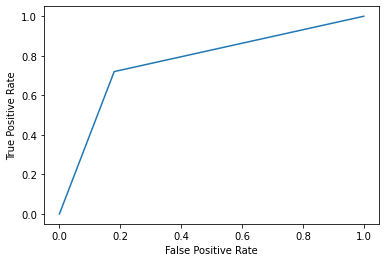

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test,y_pred)
roc_display = RocCurveDisplay(fpr=fpr,tpr=tpr).plot()

## 6. Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state= 0 )
rf.fit(X_train,y_train)

print(rf.score(X_test,y_test))

0.7733333333333333


In [69]:
y_pred = rf.predict(X_test)

In [71]:
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[43  7]
 [10 15]]


## 7. Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)


GaussianNB()

In [73]:
nb.score(X_test,y_test)

0.8

In [74]:
y_pred = nb.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[45  5]
 [10 15]]


In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        50
           1       0.75      0.60      0.67        25

    accuracy                           0.80        75
   macro avg       0.78      0.75      0.76        75
weighted avg       0.80      0.80      0.79        75



## 8. Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)


LogisticRegression()

In [83]:
LR.score(X_test,y_test)

0.7866666666666666

In [81]:

y_pred = LR.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[45  5]
 [11 14]]


In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        50
           1       0.74      0.56      0.64        25

    accuracy                           0.79        75
   macro avg       0.77      0.73      0.74        75
weighted avg       0.78      0.79      0.78        75



## 9. Support Vector Classification

In [100]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear' , C=0.1)
svc.fit(X_train,y_train)


SVC(C=0.1, kernel='linear')

In [101]:
svc.score(X_test,y_test)

0.7733333333333333

In [102]:
y_pred = svc.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[48  2]
 [15 10]]


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        50
           1       0.83      0.40      0.54        25

    accuracy                           0.77        75
   macro avg       0.80      0.68      0.70        75
weighted avg       0.79      0.77      0.75        75



## 10. Multilayer Perceptron (MLP)

In [96]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=[10,10] , activation='tanh' , alpha = 0.1 , max_iter=100)
nn.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=[10, 10],
              max_iter=100)

In [97]:
nn.score(X_test,y_test)

0.6666666666666666

In [98]:
y_pred = nn.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[50  0]
 [25  0]]


In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        50
           1       0.00      0.00      0.00        25

    accuracy                           0.67        75
   macro avg       0.33      0.50      0.40        75
weighted avg       0.44      0.67      0.53        75



C:\Users\Near\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Near\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Near\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 11. Cross Validation

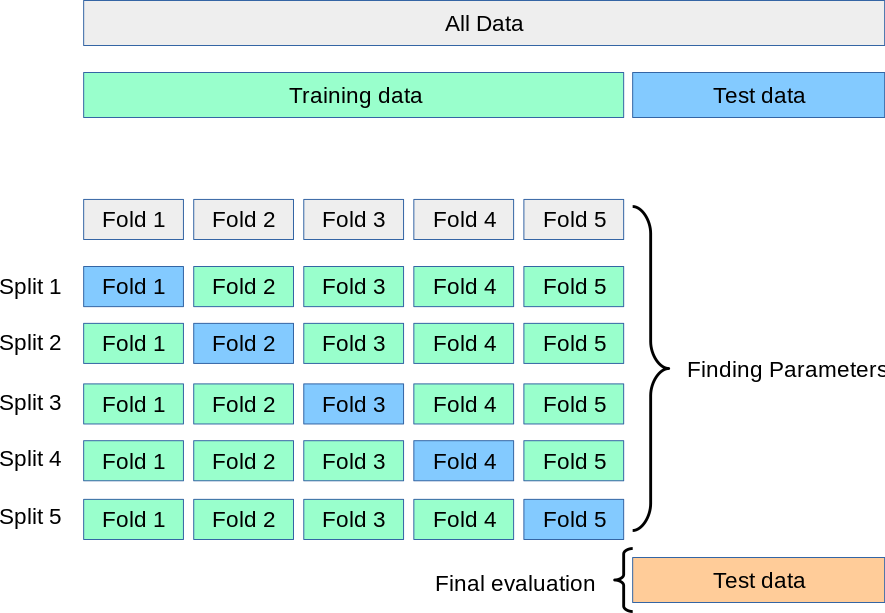

In [104]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dt.fit(X_train, y_train)

print("Train Score: {}".format(dt.score(X_train, y_train)))
print("Test Score : {}".format(dt.score(X_test, y_test)))

Train Score: 0.9419642857142857
Test Score : 0.7866666666666666


In [112]:
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(max_depth = 5, random_state = 0)
cv_score= cross_val_score(dt,X_train,y_train,cv = 10) # default 5-fold
print("Cross-validation scores (5-fold)    : ", cv_score )
print("Mean cross-validation score (5-fold): ", np.mean(cv_score) )

Cross-validation scores (5-fold)    :  [0.7826087  0.91304348 0.82608696 0.7826087  0.81818182 0.81818182
 0.68181818 0.72727273 0.77272727 0.72727273]
Mean cross-validation score (5-fold):  0.7849802371541502


numpy.ndarray

In [115]:
# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(dt,X_train,y_train,cv = 10).mean())
# use AUC as scoring metric
print('Cross-validation (AUC)     ', cross_val_score(dt,X_train,y_train,cv = 10 , scoring = 'roc_auc').mean().round(2))
# use recall as scoring metric
print('Cross-validation (recall)  ', cross_val_score(dt,X_train,y_train,cv = 10 , scoring = 'recall').mean().round(2))

Cross-validation (accuracy) 0.7849802371541502
Cross-validation (AUC)      0.74
Cross-validation (recall)   0.59


## 12. Cross Validation and Grid Search

In [116]:
rf = RandomForestClassifier(n_estimators = 10, random_state=0)
rf.fit(X_train, y_train)

print("Train Score: {}".format(rf.score(X_train, y_train)))
print("Test Score : {}".format(rf.score(X_test, y_test)))

Train Score: 0.9866071428571429
Test Score : 0.7733333333333333


In [118]:
grid = { 
    'n_estimators': [10,20,30,40,50],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [121]:
from sklearn.model_selection import GridSearchCV

rf_cv = GridSearchCV(estimator=RandomForestClassifier() ,param_grid= grid , cv=5)
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'random_state': [18]})

In [123]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 40,
 'random_state': 18}

In [125]:
rf2 = RandomForestClassifier(n_estimators = 40, max_depth = 6, max_features = 'sqrt',random_state = 18, criterion = 'gini')
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=40,
                       random_state=18)

In [126]:
rf2.score(X_test,y_test)

0.8533333333333334

# Exercise: Breast Cancer

ระหว่าง DecisionTree และ KNN อัลกอริทึมไหน ให้ผลการทำนายที่แม่นย่ำมากกว่ากัน
เมื่อทำการทดลองแบบ 10 fold cross-valiadation บนข้อมูลทั้งหมดที่มี
พารามิเตอร์ที่สนใจสำหรับ KNN คือ k และ พารามิเตอร์ที่สนใจสำหรับ DecisionTree คือ max depth เท่านั้น


## ตอบ

ระหว่าง DecisionTree และ KNN อัลกอริทึมที่ดี คือ  KNN ด้วยค่า accuracy ที่มากกว่า Decision tree อยู่ที่ 0.01

โดยให้ค่าความถูกต้องจากการทำ 10 fold cross-validate เป็น 0.93 หรือ 93 %

โดยมี parameter เป็น  n_neighbors  =  10 หรือ k = 10

---

In [128]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

## Decision tree


In [189]:
grid_tree = {

    'max_depth' : list(range(1, 31))
}

In [190]:
Tree_grid_cv = GridSearchCV(estimator=DecisionTreeClassifier() ,param_grid= grid_tree , cv=10)
Tree_grid_cv.fit(X_cancer,y_cancer)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30]})

In [191]:
## Best Depth
Tree_grid_cv.best_params_

{'max_depth': 28}

In [193]:
dt = DecisionTreeClassifier(max_depth = 28, random_state = 0)

In [194]:
Tree_score = cross_val_score(dt,X_cancer,y_cancer,cv = 10)
print('Decision Tree score cross validation {:.2f}' .format(Tree_score.mean()))

Decision Tree score cross validation 0.92


## KNN

In [195]:
grid_KNN = {
    'n_neighbors' : list(range(1, 31))
}

In [196]:
knn_grid_cv = GridSearchCV(estimator=KNeighborsClassifier() ,param_grid= grid_KNN , cv=10)
knn_grid_cv.fit(X_cancer,y_cancer)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [197]:
## Best Neighbour
knn_grid_cv.best_params_

{'n_neighbors': 10}

In [198]:
knn = KNeighborsClassifier(n_neighbors=10)
knn_score = cross_val_score(knn ,X_cancer,y_cancer,cv = 10)
print('KNeighborsClassifier score cross validation {:.2f}' .format(knn_score.mean()))

KNeighborsClassifier score cross validation 0.93
